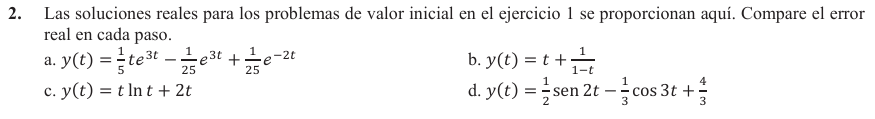

In [1]:
import numpy as np
import pandas as pd

# Método de Euler
def euler_method(f, t0, y0, h, t_end):
    steps = int((t_end - t0) / h) + 1
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    for _ in range(steps - 1):
        y += h * f(t, y)
        t += h
        t_values.append(t)
        y_values.append(y)
    return pd.DataFrame({"t": t_values, "y": y_values})

# Funciones de derivadas (problema 1)
f_a = lambda t, y: t * np.exp(3 * t) - 2 * y
f_b = lambda t, y: 1 + (t - y)**2
f_c = lambda t, y: 1 + y / t
f_d = lambda t, y: np.cos(2 * t) + np.sin(3 * t)

# Aplicar método de Euler a cada problema
df_a = euler_method(f_a, 0, 0, 0.5, 1)
df_b = euler_method(f_b, 2, 1, 0.5, 3)
df_c = euler_method(f_c, 1, 2, 0.25, 2)
df_d = euler_method(f_d, 0, 1, 0.25, 1)

# Funciones exactas (problema 2)
def exact_a(t):
    return (1/5)*t*np.exp(3*t) - (1/25)*np.exp(3*t) + (1/25)*np.exp(-2*t)

def exact_b(t):
    return t + 1/(1 - t)

def exact_c(t):
    return t * np.log(t) + 2 * t

def exact_d(t):
    return 0.5 * np.sin(2*t) - (1/3) * np.cos(3*t) + 4/3

# Comparar con solución exacta
def comparar(df, exact_func):
    df["y_exacta"] = exact_func(df["t"])
    df["error"] = np.abs(df["y"] - df["y_exacta"])
    return df[["t", "y", "y_exacta", "error"]]

# Calcular errores
df_a_err = comparar(df_a, exact_a)
df_b_err = comparar(df_b, exact_b)
df_c_err = comparar(df_c, exact_c)
df_d_err = comparar(df_d, exact_d)

# Mostrar resultados
print("\n--- a. Error Método de Euler ---")
print(df_a_err)
print("\n--- b. Error Método de Euler ---")
print(df_b_err)
print("\n--- c. Error Método de Euler ---")
print(df_c_err)
print("\n--- d. Error Método de Euler ---")
print(df_d_err)



--- a. Error Método de Euler ---
     t         y  y_exacta     error
0  0.0  0.000000  0.000000  0.000000
1  0.5  0.000000  0.283617  0.283617
2  1.0  1.120422  3.219099  2.098677

--- b. Error Método de Euler ---
     t      y  y_exacta     error
0  2.0  1.000  1.000000  0.000000
1  2.5  2.000  1.833333  0.166667
2  3.0  2.625  2.500000  0.125000

--- c. Error Método de Euler ---
      t         y  y_exacta     error
0  1.00  2.000000  2.000000  0.000000
1  1.25  2.750000  2.778929  0.028929
2  1.50  3.550000  3.608198  0.058198
3  1.75  4.391667  4.479328  0.087661
4  2.00  5.269048  5.386294  0.117247

--- d. Error Método de Euler ---
      t         y  y_exacta     error
0  0.00  1.000000  1.000000  0.000000
1  0.25  1.250000  1.329150  0.079150
2  0.50  1.639805  1.730490  0.090684
3  0.75  2.024255  2.041472  0.017217
4  1.00  2.236457  2.117980  0.118478
